1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


C:\Users\TJ\AppData\Local\Temp\ipykernel_3276\3869164362.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  plt.plot(pd.date_range(series.index[-1]+pd.Timedelta(hours=1), periods=HORIZON, freq="H"),


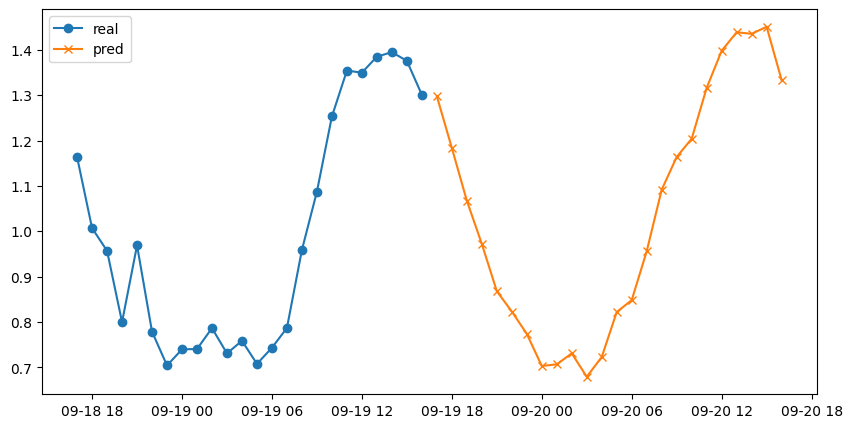

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

WIN, HORIZON = 24, 24

model = load_model("d:/data/chart/model_lstm.h5")

df = pd.read_csv("d:/data/chart/data.csv")
df["ts"] = pd.to_datetime(df["ts"])
df = df.sort_values("ts")
series = pd.Series(df["y"].values, index=df["ts"])

x_input = series.values[-WIN:].astype("float32").reshape(1, WIN, 1)

y_pred = model.predict(x_input)[0]

y_true = series.values[-HORIZON:]

plt.figure(figsize=(10,5))
plt.plot(series.index[-HORIZON:], y_true, label="real", marker="o")
plt.plot(pd.date_range(series.index[-1]+pd.Timedelta(hours=1), periods=HORIZON, freq="H"),
y_pred, label="pred", marker="x")
plt.legend()
plt.show()